# Case Study-Brazil Housing

### Business objective:
    People can work remotely so thay want to relocate to another city,there living expensive is less.
    Help the real estate company to find out suitable cities for bachelors, mid size family and large family.

## Level 0 analysis(understanding the data)

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np 
import squarify

In [2]:
#read the csv file
df = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv") 

In [3]:
#display dataframe with 5 records
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
#No of rows and columns
df.shape

(10692, 13)

In [5]:
#Display name of the column
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

## The column 'total'  in the dataset is the sum of hoa,rent amount,property tax and fire insurace columns.So considering  only total column for analysis. 

In [6]:
df=df[['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture','total (R$)']].copy()

In [7]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,836


In [8]:
#Info about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking spaces  10692 non-null  int64 
 5   floor           10692 non-null  int64 
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   total (R$)      10692 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 751.9+ KB


In [9]:
df['furniture'].value_counts()

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

In [10]:
#check the null value
df.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
total (R$)        0
dtype: int64

# Level 1 Analysis

In [11]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

In [12]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                
        if df[column].nunique() < 20:       
                                                   
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)       


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  ------------
city            area
rooms           floor
bathroom        total (R$)
parking spaces
animal
furniture


### Expensive cities to exclude from the table.

In [13]:

df1 = df[(df['city']!= 'São Paulo')&(df['city'] != 'Rio de Janeiro')]

In [14]:
df1.shape

(3304, 9)

In [15]:
df1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,1421
11,Campinas,46,1,1,1,10,acept,not furnished,1181
15,Campinas,330,4,6,6,0,acept,furnished,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,3368


# 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 𝐶𝑎𝑡𝑒𝑔𝑜𝑟𝑖𝑐𝑎𝑙 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠
 


# Level 1 Analysis:Univariate analysis

## Analysis of city

In [16]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df1[col].unique()}") 
    print(f"Mode of {col} is {df1[col].mode()[0]}") 
    print(f"Number of missing values in {col} is {df1[col].isnull().sum()}") 
info_of_cat('city')      

Unique values in city are: ['Porto Alegre' 'Campinas' 'Belo Horizonte']
Mode of city is Belo Horizonte
Number of missing values in city is 0


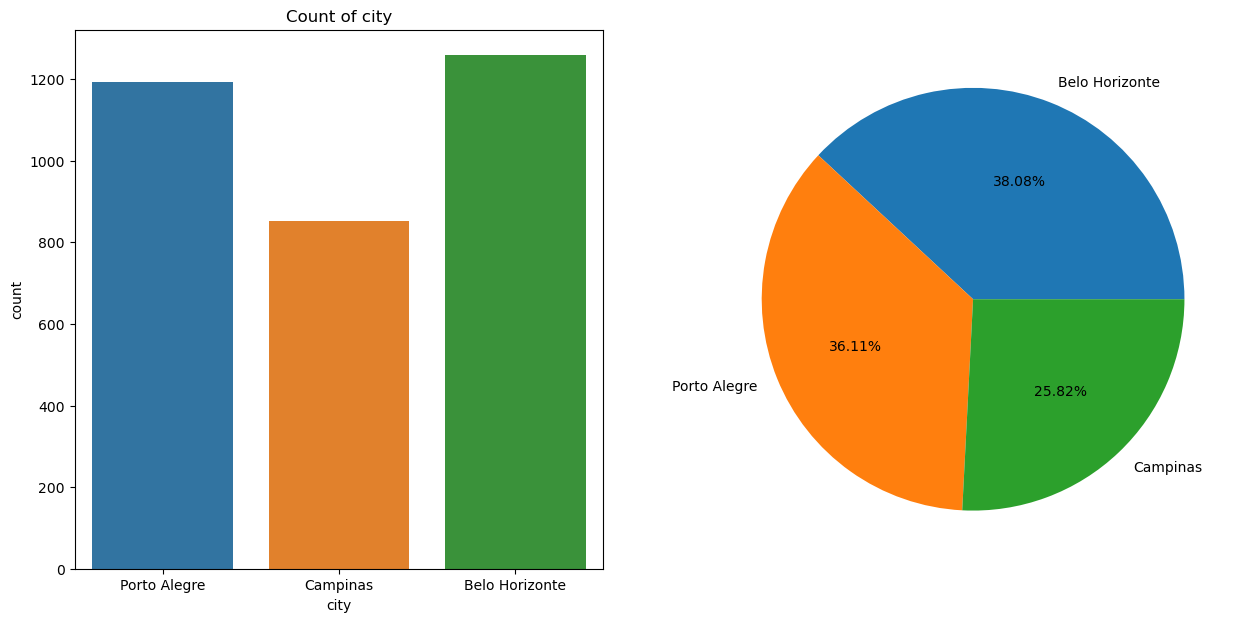

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of city")                 
percentage = df1["city"].value_counts()         
labels = list(df1["city"].value_counts().index) 

sns.countplot(x = df1["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

## Analysis of rooms

In [18]:
info_of_cat('rooms')  

Unique values in rooms are: [ 1  2  4  3  5  6  7 10  8]
Mode of rooms is 2
Number of missing values in rooms is 0


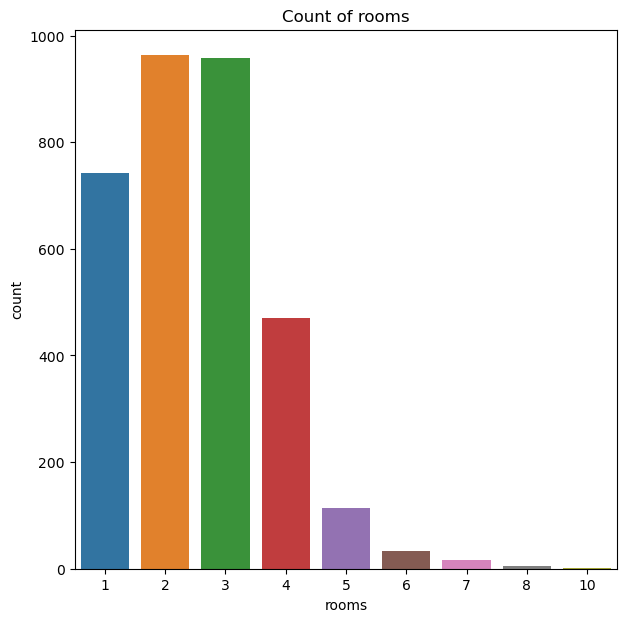

In [19]:
fig, ax = plt.subplots(figsize= (7, 7))
plt.title("Count of rooms") 
ax = sns.countplot(x = "rooms",data = df1)

(0.0, 100.0, 0.0, 100.0)

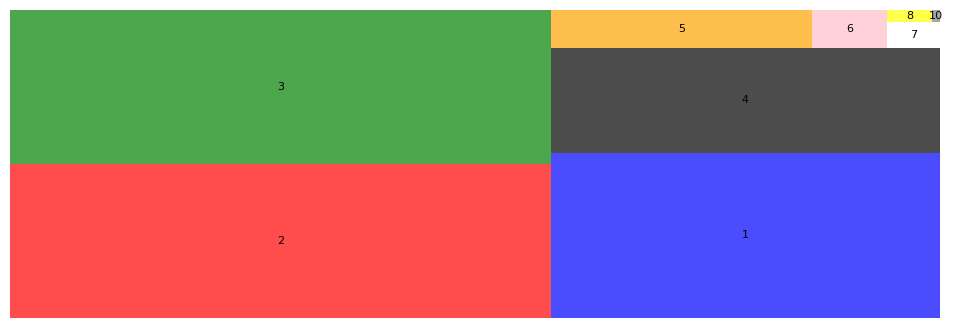

In [20]:
x=df1['rooms'].value_counts() 
label=(x.index)
#plt.style.use('dark_background')
plt.rcParams.update({'font.size':8})
plt.figure(figsize=(12,4))
squarify.plot(sizes=x.values,label=label,color=['red','green','blue','black','orange','pink','white','yellow','grey'],alpha=.7)
plt.axis('off')

## Analysis of bathroom

In [21]:
info_of_cat('bathroom')  

Unique values in bathroom are: [ 1  6  2  3  4  7  5  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


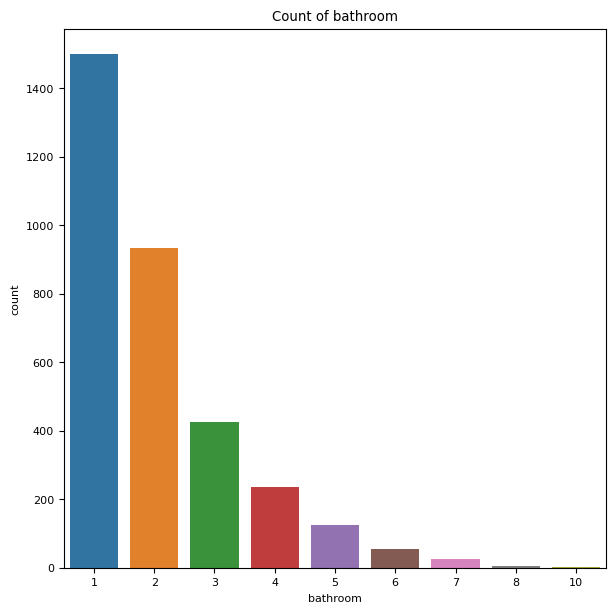

In [22]:
fig, ax = plt.subplots(figsize= (7, 7))
plt.title("Count of bathroom") 
ax = sns.countplot(x = "bathroom",data = df1)

(0.0, 100.0, 0.0, 100.0)

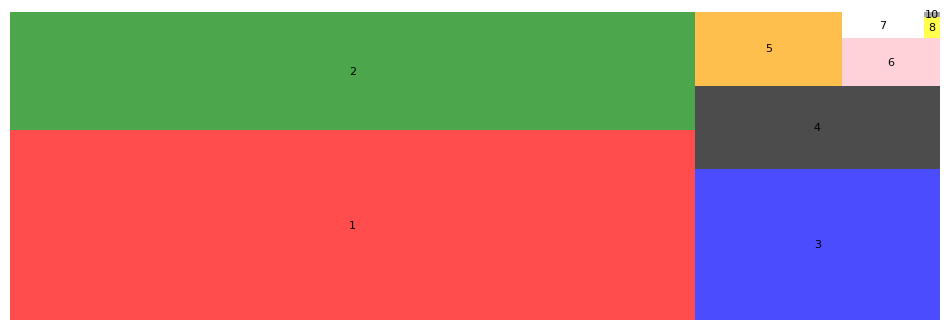

In [23]:
x=df1['bathroom'].value_counts() 
label=(x.index)
#plt.style.use('dark_background')
plt.rcParams.update({'font.size':8})
plt.figure(figsize=(12,4))
squarify.plot(sizes=x.values,label=label,color=['red','green','blue','black','orange','pink','white','yellow','grey'],alpha=.7)
plt.axis('off')

## Analysis of parking spaces

In [24]:
info_of_cat('parking spaces')  

Unique values in parking spaces are: [1 0 6 4 2 3 8 5 7]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


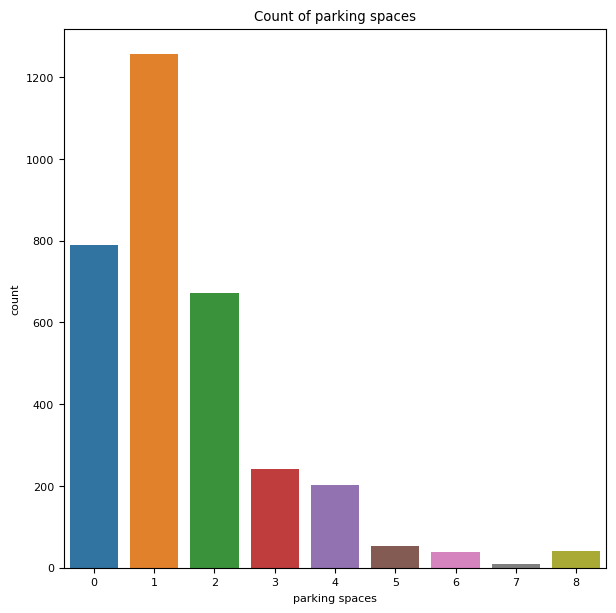

In [25]:
fig, ax = plt.subplots(figsize= (7, 7))
plt.title("Count of parking spaces") 
ax = sns.countplot(x = "parking spaces",data = df1)

(0.0, 100.0, 0.0, 100.0)

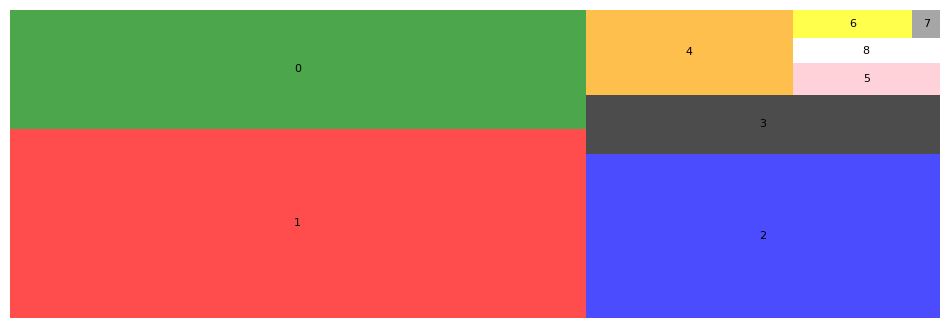

In [26]:
x=df1['parking spaces'].value_counts() 
label=(x.index)
#plt.style.use('dark_background')
plt.rcParams.update({'font.size':8})
plt.figure(figsize=(12,4))
squarify.plot(sizes=x.values,label=label,color=['red','green','blue','black','orange','pink','white','yellow','grey'],alpha=.7)
plt.axis('off')

## Analysis of animal

In [27]:
info_of_cat('animal')

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


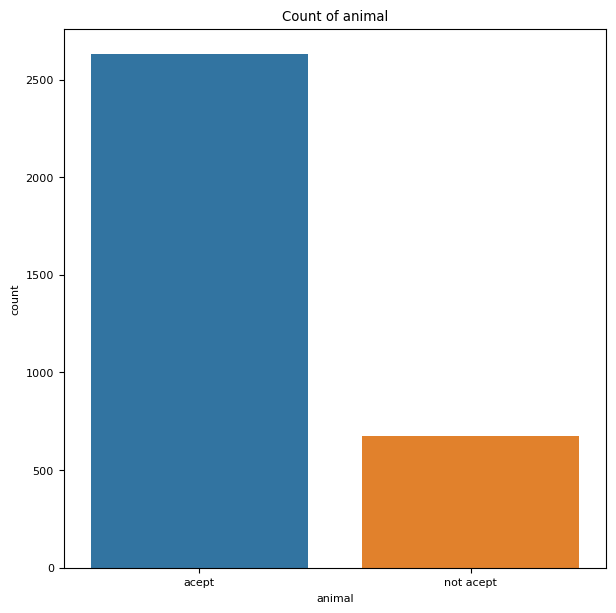

In [28]:
fig, ax = plt.subplots(figsize= (7, 7))
plt.title("Count of animal") 
ax = sns.countplot(x = "animal",data = df1)


(0.0, 100.0, 0.0, 100.0)

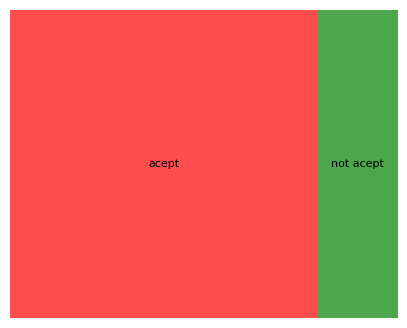

In [29]:
x=df1['animal'].value_counts() 
label=(x.index)
#plt.style.use('dark_background')
plt.rcParams.update({'font.size':8})
plt.figure(figsize=(5,4))
squarify.plot(sizes=x.values,label=label,color=['red','green','blue','white','orange','pink','white','yellow','grey'],alpha=.7)
plt.axis('off')

## Analysis of furniture

In [30]:
info_of_cat('furniture')

Unique values in furniture are: ['not furnished' 'furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


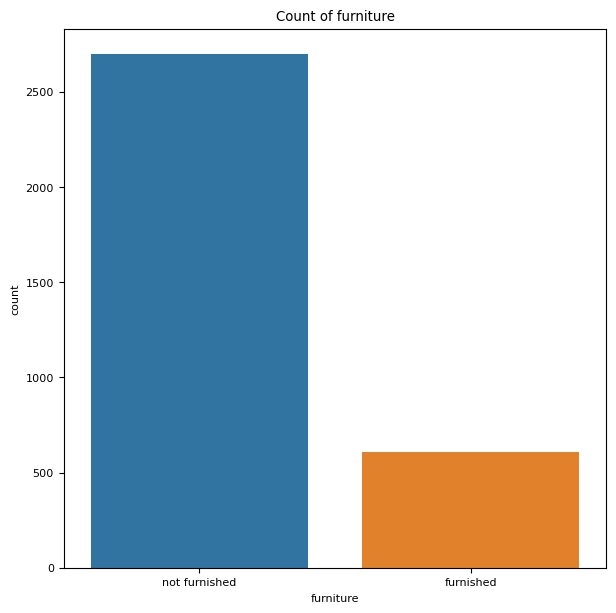

In [31]:
fig, ax = plt.subplots(figsize= (7, 7))
plt.title("Count of furniture") 
ax = sns.countplot(x = "furniture",data = df1)


(0.0, 100.0, 0.0, 100.0)

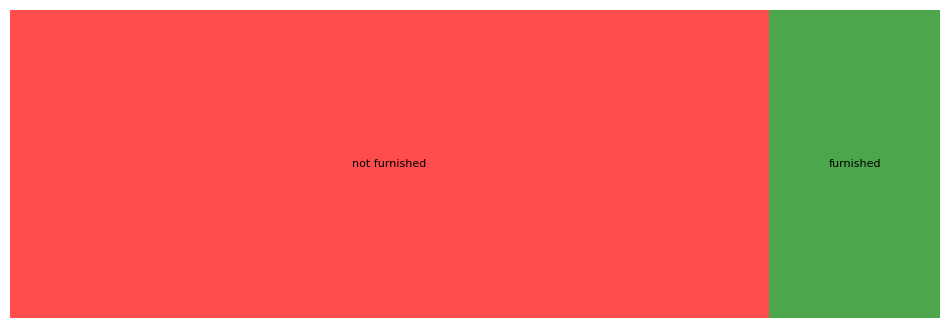

In [32]:
x=df1['furniture'].value_counts() 
label=(x.index)
#plt.style.use('dark_background')
plt.rcParams.update({'font.size':8})
plt.figure(figsize=(12,4))
squarify.plot(sizes=x.values,label=label,color=['red','green','blue','white','orange','pink','white','yellow','grey'],alpha=.7)
plt.axis('off')

# 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 𝑁𝑢𝑚𝑒𝑟𝑖𝑐𝑎𝑙 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

## Level 1 Analysis of Numerical Columns

In [33]:
#mean,median,mode,std and finding all missing values
def info_of_numerical(col):
    print(f"The mean of the {col} is {df1[col].mean()}")
    print(f"The median of the {col} is {df1[col].median()}")
    print(f"The mode of the {col} is {df1[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df1[col].std()}")
    print(f"Number of missing values in the {col} is {df1[col].isnull().sum()}")

## Analysis of area

In [34]:
info_of_numerical('area')

The mean of the area is 151.89769975786925
The median of the area is 80.0
The mode of the area is 70
The standard deviation of the area is 844.549115817972
Number of missing values in the area is 0


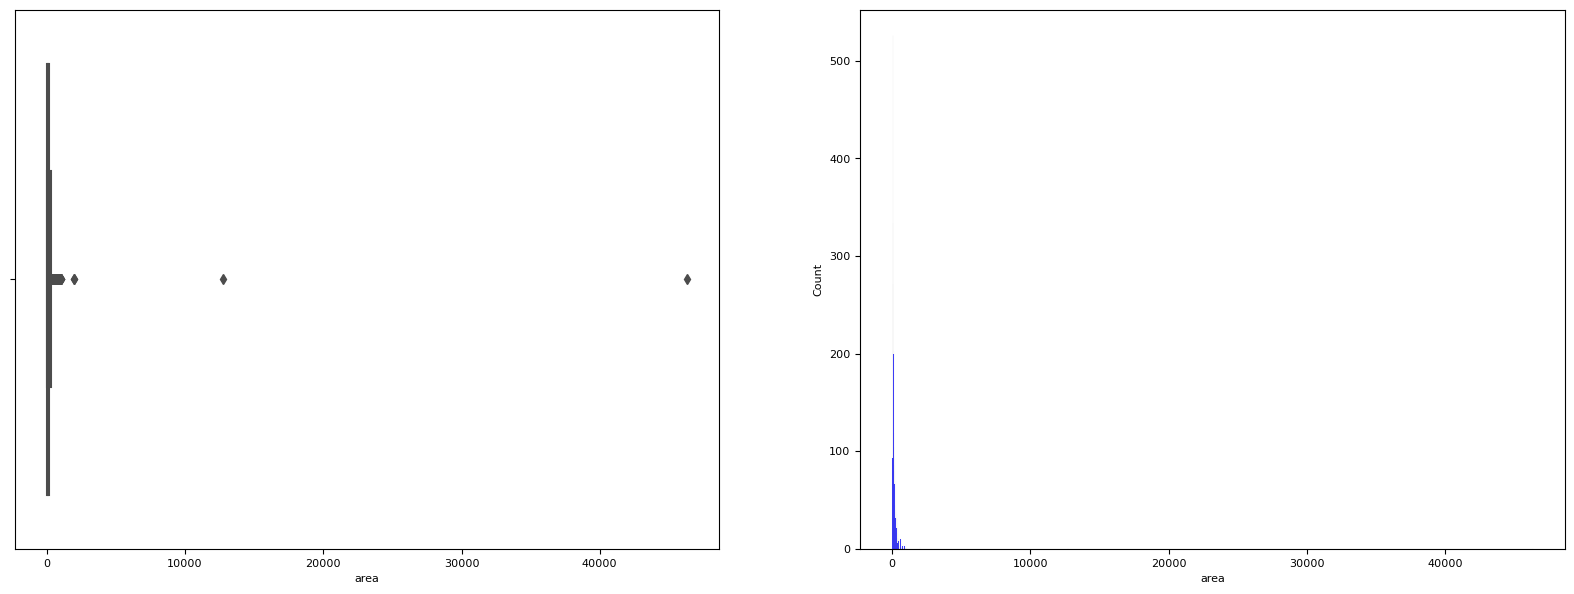

In [35]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))                
sns.histplot(x = df1["area"], ax =ax[1], color = "b") 
sns.boxplot(x = df1["area"], ax = ax[0], color = "r") 
plt.show()

## outliers analysis and  treatmaent for area

In [36]:
def outliers(column):
    print("The mean  is", df1[column].mean())
    Q1=df1[column].quantile(0.25)
    Q3=df1[column].quantile(0.75)
    print('value of Q1 and Q3',Q1,',',Q3)
    IQR=Q3-Q1
    print('value of IQR',IQR)
    UF = Q3 + (1.5 * IQR) 
    LF = Q1 - (1.5 * IQR)
    print('value of UF and LF',UF,',',LF)
    outlier=[]
    for i in df1[column]: 
            if (i<LF or i>UF):
                outlier.append(i)

    print("Outliers from IQR method: ", outlier)
    
    a = df1[column].mean()
    for i in outlier:
        df1[column]=df1[column].replace(to_replace=i,value=a)

In [37]:
outliers('area')

The mean  is 151.89769975786925
value of Q1 and Q3 55.0 , 160.0
value of IQR 105.0
value of UF and LF 317.5 , -102.5
Outliers from IQR method:  [330, 350, 400, 999, 420, 570, 320, 600, 362, 360, 440, 350, 417, 350, 548, 428, 500, 398, 680, 450, 450, 360, 750, 650, 1000, 550, 405, 320, 325, 383, 341, 600, 345, 367, 840, 600, 340, 340, 800, 600, 350, 360, 360, 360, 650, 340, 450, 350, 497, 650, 573, 400, 500, 420, 500, 981, 850, 660, 450, 462, 540, 350, 660, 622, 350, 320, 553, 450, 360, 400, 350, 450, 360, 340, 46335, 700, 440, 1020, 348, 521, 563, 410, 318, 384, 649, 400, 430, 544, 360, 450, 430, 580, 800, 700, 400, 413, 396, 375, 402, 425, 359, 1000, 424, 380, 400, 550, 450, 470, 355, 400, 450, 360, 450, 429, 682, 320, 450, 800, 470, 350, 600, 320, 502, 578, 900, 400, 367, 900, 999, 400, 500, 500, 402, 470, 444, 372, 600, 346, 520, 365, 800, 350, 500, 2000, 373, 318, 326, 474, 343, 330, 347, 350, 320, 344, 350, 465, 950, 320, 360, 348, 400, 329, 341, 362, 400, 387, 520, 471, 344, 400,

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11568\1036927177.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column]=df1[column].replace(to_replace=i,value=a)


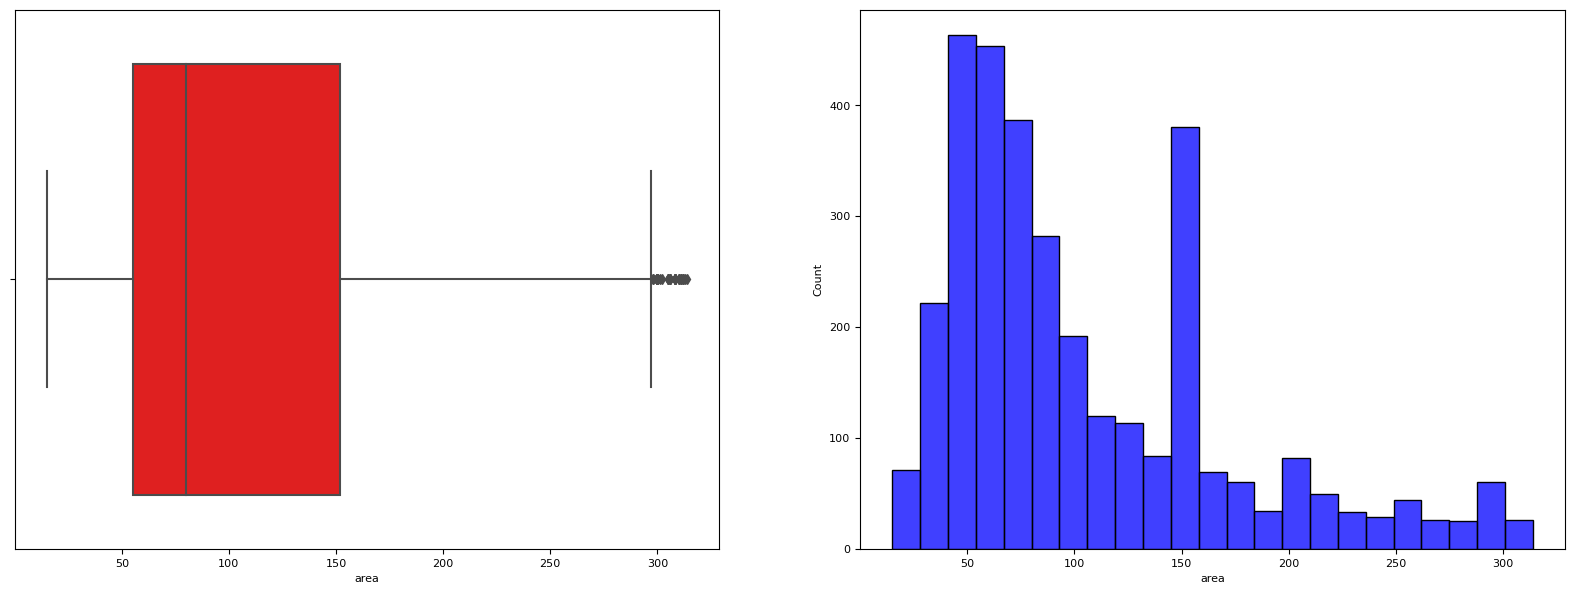

In [38]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df1["area"], ax =ax[1], color = "b") 
sns.boxplot(x = df1["area"], ax = ax[0], color = "r") 
plt.show()

# Analysis of floor

In [39]:
info_of_numerical('floor')

The mean of the floor is 3.9900121065375305
The median of the floor is 3.0
The mode of the floor is 0
The standard deviation of the floor is 6.689621479822255
Number of missing values in the floor is 0


In [40]:
outliers('floor')

The mean  is 3.9900121065375305
value of Q1 and Q3 1.0 , 6.0
value of IQR 5.0
value of UF and LF 13.5 , -6.5
Outliers from IQR method:  [17, 14, 16, 22, 19, 14, 17, 14, 17, 20, 14, 14, 20, 15, 16, 17, 15, 14, 15, 17, 16, 18, 17, 18, 15, 17, 16, 15, 301, 20, 14, 26, 15, 14, 14, 18, 15, 14, 14, 17, 14, 15, 15, 14, 15, 16, 15, 19, 15, 15, 15, 18, 18, 15, 15, 21, 14, 16, 16, 19, 14, 18, 17, 14, 14, 19, 20, 29, 14, 18, 18, 51, 15, 20, 19, 17, 23, 17, 19, 15, 20, 16, 14, 14, 15, 15, 16, 15, 16, 20, 18, 15, 15, 23, 16, 16, 14, 15, 15, 18, 15, 15, 18, 20, 21, 17, 17, 15, 18, 18, 14, 16, 21, 15, 15, 16, 16, 15, 20, 15, 17, 17, 17, 14, 16, 14, 17, 16, 15, 15, 15]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11568\1036927177.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column]=df1[column].replace(to_replace=i,value=a)


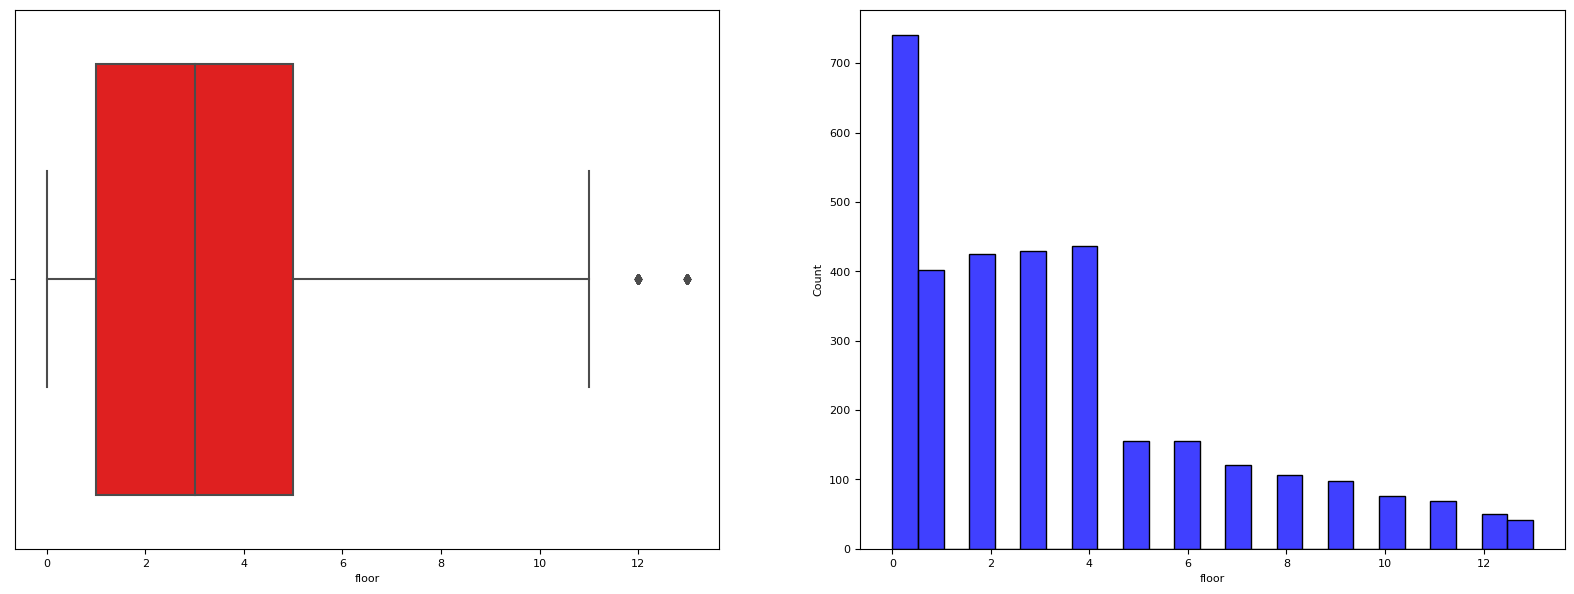

In [41]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))                
sns.histplot(x = df1["floor"], ax =ax[1], color = "b") 
sns.boxplot(x = df1["floor"], ax = ax[0], color = "r") 
plt.show()

## Analysis of total

In [42]:
info_of_numerical('total (R$)')

The mean of the total (R$) is 4303.3265738498785
The median of the total (R$) is 2348.0
The mode of the total (R$) is 2633
The standard deviation of the total (R$) is 27679.63993475239
Number of missing values in the total (R$) is 0


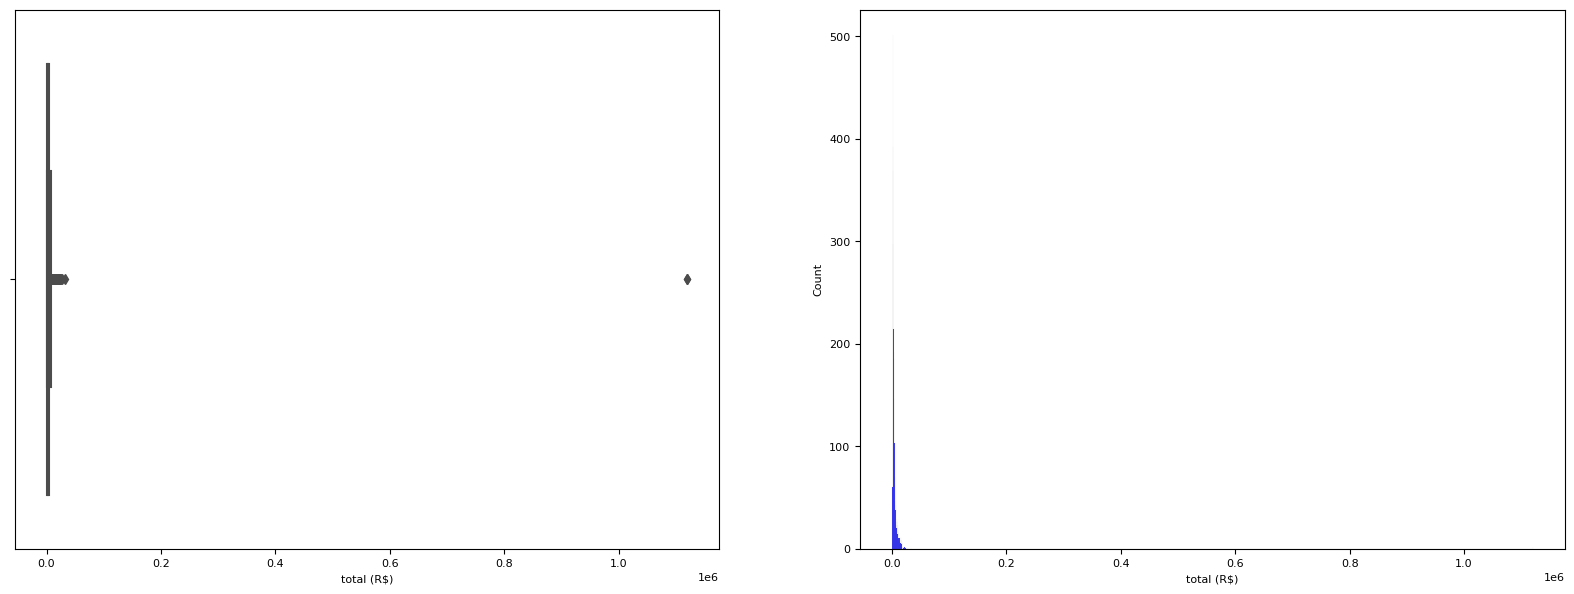

In [43]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))                
sns.histplot(x = df1["total (R$)"], ax =ax[1], color = "b") 
sns.boxplot(x = df1["total (R$)"], ax = ax[0], color = "r") 
plt.show()

In [44]:
outliers('total (R$)')

The mean  is 4303.3265738498785
value of Q1 and Q3 1512.0 , 4197.5
value of IQR 2685.5
value of UF and LF 8225.75 , -2516.25
Outliers from IQR method:  [9129, 11610, 8794, 9520, 14150, 8900, 9394, 14880, 9916, 9340, 1120000, 13180, 9396, 13600, 17920, 21310, 17890, 10840, 8226, 23590, 9301, 10430, 12810, 9427, 8560, 19340, 16100, 8980, 18000, 11220, 10360, 17130, 9660, 8253, 11280, 9463, 10430, 11320, 12280, 23250, 8643, 12480, 13380, 10600, 13450, 15290, 9231, 8269, 9989, 12470, 16570, 15000, 10860, 9410, 10610, 8852, 15280, 9070, 10110, 10900, 10490, 32750, 15630, 8746, 11630, 8283, 10170, 20100, 17760, 11730, 19800, 15730, 15850, 8830, 16610, 11090, 8716, 15270, 9901, 12090, 15160, 9218, 17010, 10220, 10970, 10840, 10910, 21670, 10950, 19720, 8515, 16310, 8961, 21500, 10580, 16400, 8966, 16410, 8588, 11010, 8675, 9819, 10410, 12180, 16020, 9695, 10060, 10060, 10200, 8736, 15660, 12300, 15070, 13560, 8246, 9205, 9886, 16310, 15640, 11420, 8884, 9920, 8302, 11020, 12640, 10440, 12570,

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11568\1036927177.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column]=df1[column].replace(to_replace=i,value=a)


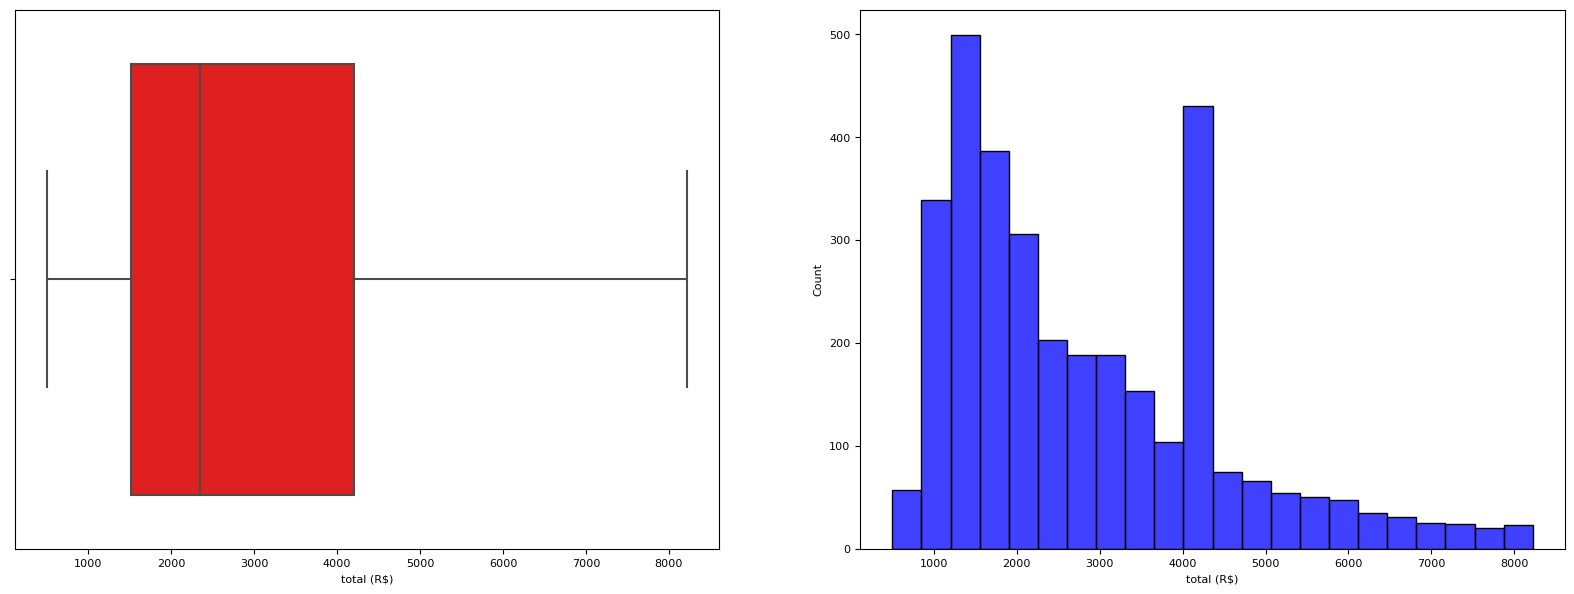

In [45]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))                
sns.histplot(x = df1["total (R$)"], ax =ax[1], color = "b") 
sns.boxplot(x = df1["total (R$)"], ax = ax[0], color = "r") 
plt.show()

# Univariate analysis of room for bachelors to relocate

In [46]:
#filter the records for bachleors.

B_df = df1[df1['rooms']<=2]
B_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
2,Porto Alegre,80.0,1,1,1,6.000000,acept,not furnished,3841.0
3,Porto Alegre,51.0,2,1,0,2.000000,acept,not furnished,1421.0
11,Campinas,46.0,1,1,1,10.000000,acept,not furnished,1181.0
21,Belo Horizonte,42.0,1,1,1,3.990012,not acept,furnished,3368.0
27,Belo Horizonte,64.0,2,2,1,11.000000,acept,not furnished,1952.0
...,...,...,...,...,...,...,...,...,...
10661,Campinas,250.0,1,2,2,0.000000,acept,not furnished,2836.0
10665,Belo Horizonte,55.0,2,1,1,2.000000,not acept,furnished,1897.0
10667,Belo Horizonte,75.0,2,1,1,3.000000,not acept,not furnished,1447.0
10676,Porto Alegre,40.0,1,1,0,1.000000,acept,not furnished,1707.0


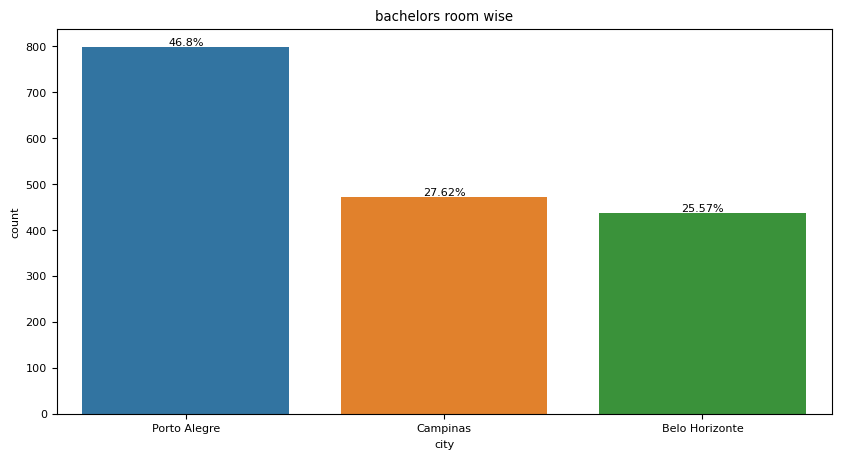

In [47]:
def bar_percentage(ax, count: "number of rows in data "):
    for bar in ax.patches:                                            
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  
                                                                           
        x = bar.get_x() + bar.get_width() /2                          
        y = bar.get_height()                                          
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") 
                                                                      
    plt.show()

fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "city", data = B_df)
plt.title('bachelors room wise')

bar_percentage(ax, len(B_df))


### Interpretation:

For the bachelors, who want single or double rooms.
As per the to the above count plot, Porto alegera city has 47% with <=2 rooms .

## Level 2: Bivariate Analysis

## Relationship of Area with city.

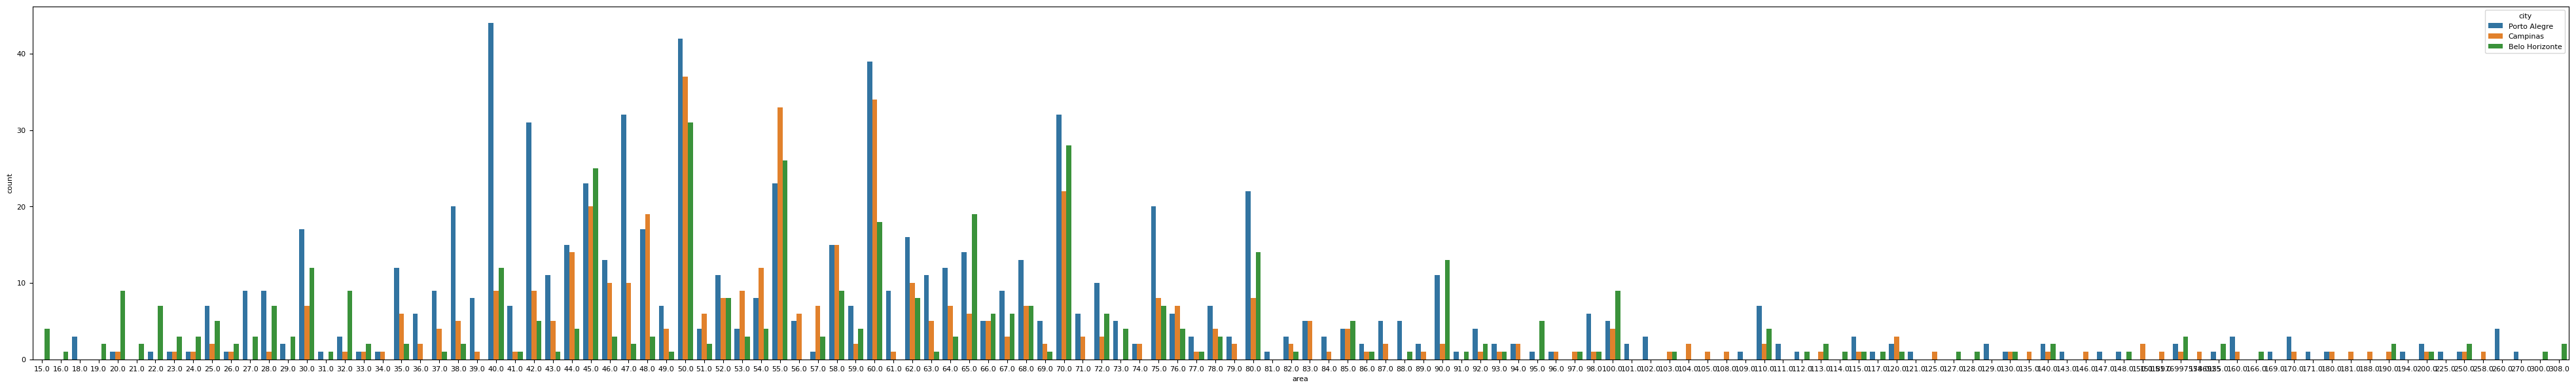

In [48]:
fig, ax = plt.subplots(figsize = (50, 7))
sns.countplot(x = "area", hue = "city", data = B_df)
plt.show()

# Interpretation:

For the bachelors, Porto algere and Belo Horizonte are the cities have wide range of rooms available  than Campinas city with area 20-120.


# Level 3: Multivariate Analysis

## Further Analysis:

which are the cities for bachelors with area between 30-100 ? To consider which city has more spreaded? 

In [49]:
B_df1 =  B_df[(B_df["area"] >= 30) & (B_df["area"] <= 100)]
B_df1
a=B_df1['total (R$)'].mean()
a

1863.7377360612966

In [50]:
B_df1 = B_df1[B_df1['total (R$)'] <=a]

In [51]:
B_df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
3,Porto Alegre,51.0,2,1,0,2.0,acept,not furnished,1421.0
11,Campinas,46.0,1,1,1,10.0,acept,not furnished,1181.0
84,Belo Horizonte,68.0,2,1,1,3.0,acept,not furnished,1563.0
96,Campinas,44.0,1,1,0,7.0,acept,not furnished,919.0
100,Porto Alegre,50.0,1,1,1,1.0,acept,not furnished,1364.0
...,...,...,...,...,...,...,...,...,...
10642,Porto Alegre,40.0,1,1,0,2.0,acept,not furnished,950.0
10644,Belo Horizonte,65.0,2,1,1,1.0,acept,not furnished,1385.0
10648,Belo Horizonte,80.0,2,1,1,3.0,not acept,not furnished,1523.0
10667,Belo Horizonte,75.0,2,1,1,3.0,not acept,not furnished,1447.0


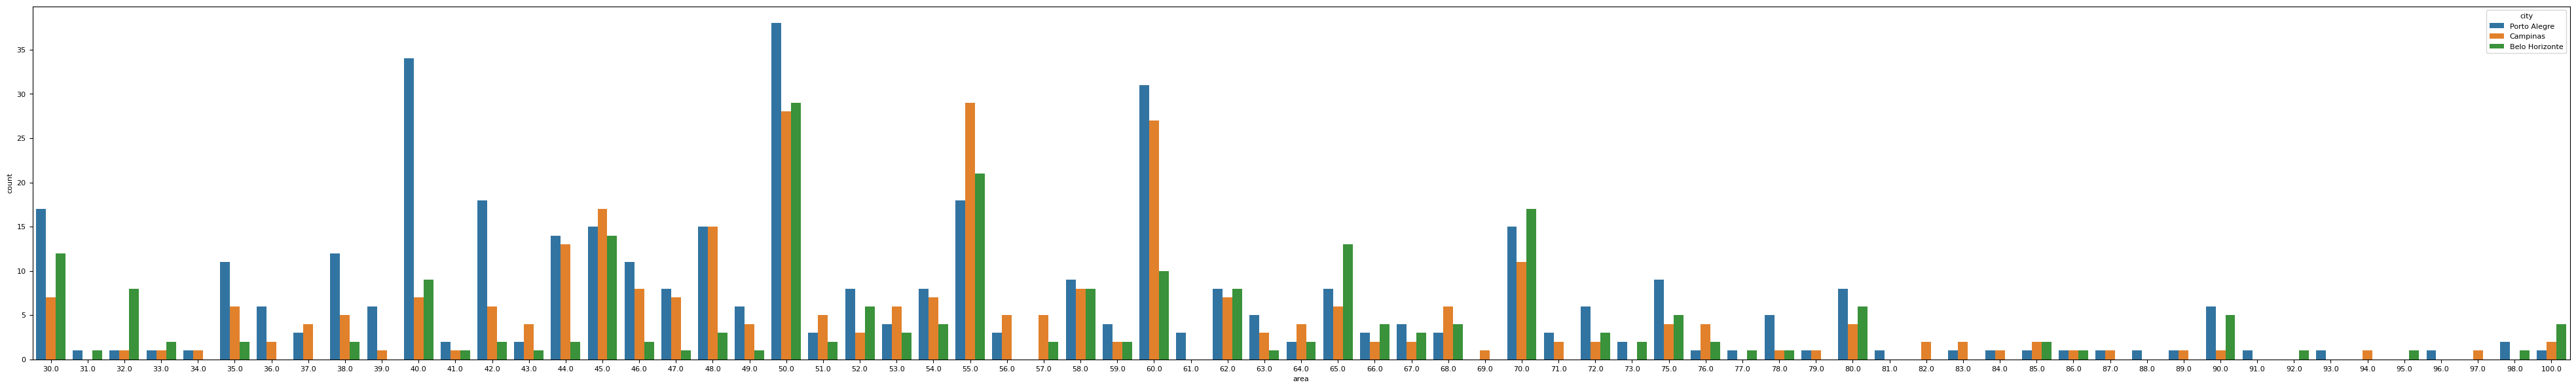

In [52]:
fig, ax = plt.subplots(figsize = (50, 7))
sns.countplot(x = "area", hue = "city", data = B_df1)
plt.show()

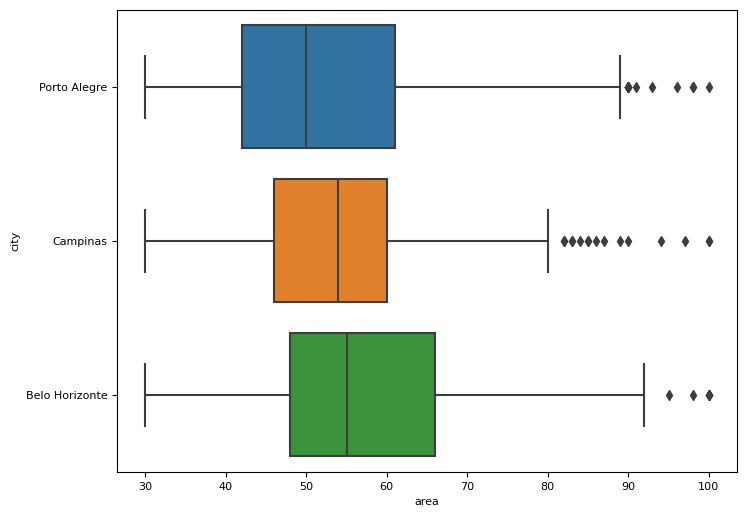

In [53]:
plt.figure(figsize=(8,6))
sns.boxplot(x='area',y='city',data=B_df1)
plt.show()

# Interpretation:
Belo Horizonte and Porto Algre have the highest range of houses with area between 30-100, with <=2 rooms.

### Deeper Analysis
To find which city have most affordable place for batchelors to relocate.We consider the area lay between the 30 -100, and other facilities like bathroom and furniture.

In [54]:
B_df1 =  B_df1[(B_df1['bathroom']<=2)&(B_df1['furniture']=='furnished')]
B_df1
a=B_df1['total (R$)'].mean()
a

1445.3725490196077

In [55]:
B_df1 = B_df1[B_df1['total (R$)'] <=a]

In [56]:
B_df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
136,Campinas,44.0,1,1,0,3.0,acept,furnished,1290.0
620,Porto Alegre,42.0,1,1,0,1.0,acept,furnished,1263.0
772,Porto Alegre,55.0,2,1,1,0.0,acept,furnished,1358.0
910,Belo Horizonte,40.0,1,1,1,2.0,not acept,furnished,983.0
920,Belo Horizonte,40.0,1,1,1,2.0,not acept,furnished,983.0
1068,Campinas,47.0,1,1,0,1.0,acept,furnished,951.0
1366,Porto Alegre,42.0,1,1,0,3.0,acept,furnished,1216.0
1550,Porto Alegre,32.0,1,1,0,0.0,acept,furnished,1014.0
1558,Porto Alegre,35.0,1,1,0,3.0,acept,furnished,1108.0
1644,Porto Alegre,35.0,2,1,0,1.0,not acept,furnished,1370.0


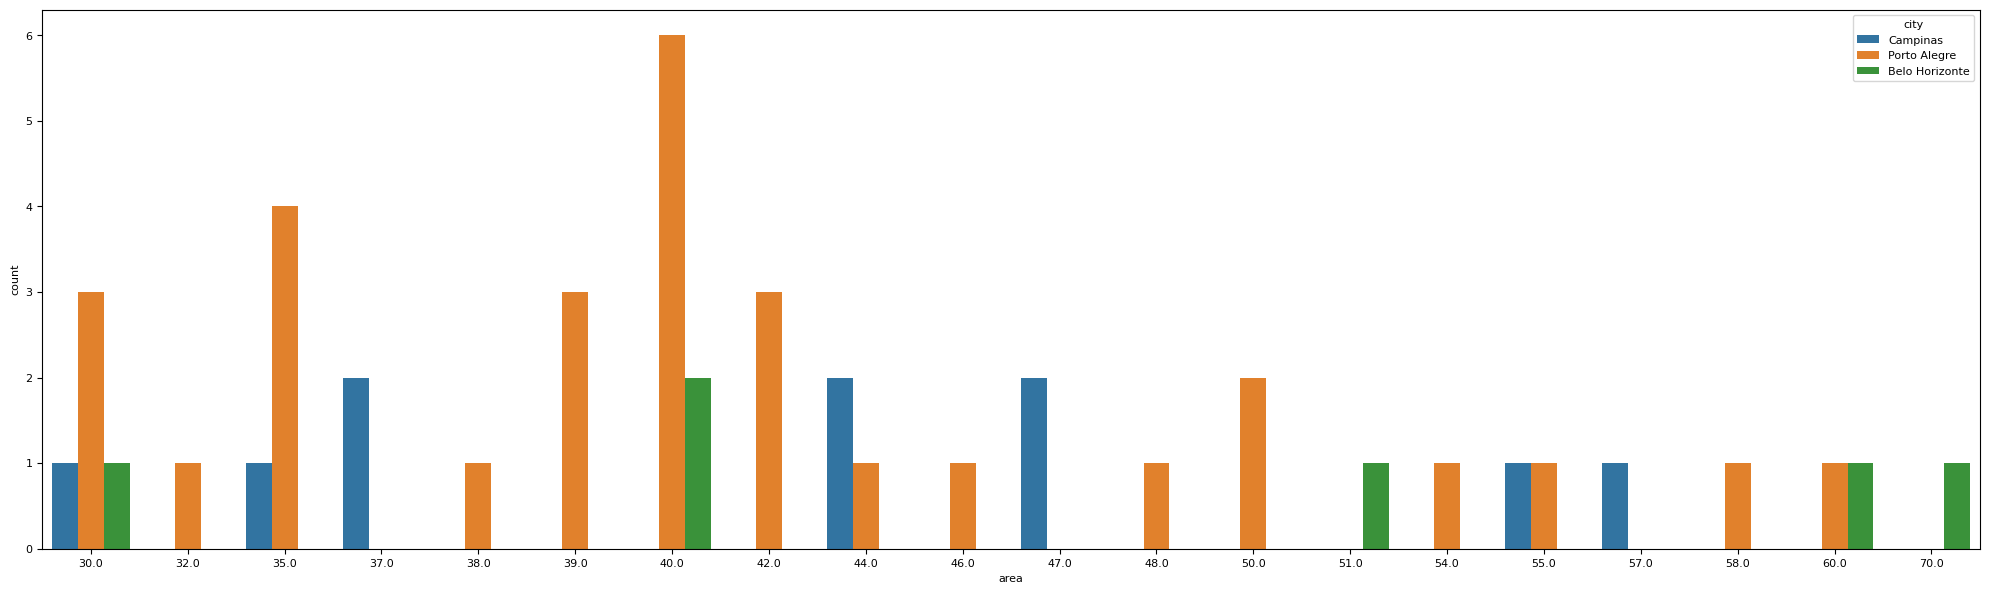

In [57]:
fig, ax = plt.subplots(figsize = (25, 7))
sns.countplot(x = "area", hue = "city", data = B_df1)
plt.show()

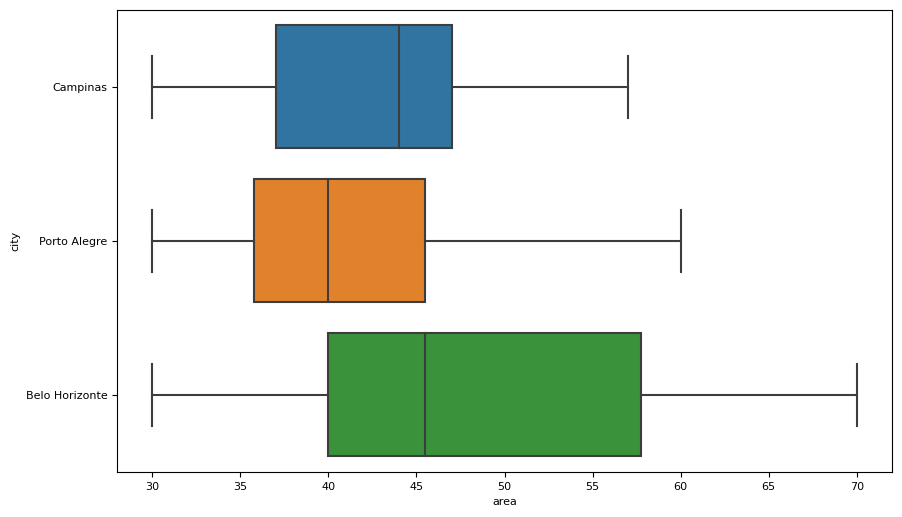

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x='area',y='city',data=B_df1)
plt.show()

## Interpretation:
Porto Alegre and Belo Horizonte have wide range of houses with area between 30 t0 100 , with <=2 rooms ,with low cost and all other facilities.
 As per the above count plot Porto Alegre and Belo Horizonte are the most affordable city for bachleors.
    

# Level 1: Univariate analysis of room for Mid-sized Families to relocate

In [59]:
# Filter the data according to midsized families.
# Relocating cities
M_df = df1[(df1['rooms'] >1) & (df1['rooms']<=4)]
              
M_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
3,Porto Alegre,51.0000,2,1,0,2.000000,acept,not furnished,1421.000000
15,Campinas,151.8977,4,6,6,0.000000,acept,furnished,4303.326574
27,Belo Horizonte,64.0000,2,2,1,11.000000,acept,not furnished,1952.000000
28,Campinas,208.0000,3,2,4,0.000000,acept,not furnished,3328.000000
37,Belo Horizonte,80.0000,3,2,1,0.000000,acept,not furnished,4303.326574
...,...,...,...,...,...,...,...,...,...
10665,Belo Horizonte,55.0000,2,1,1,2.000000,not acept,furnished,1897.000000
10667,Belo Horizonte,75.0000,2,1,1,3.000000,not acept,not furnished,1447.000000
10673,Porto Alegre,220.0000,3,2,2,3.990012,acept,not furnished,3395.000000
10682,Porto Alegre,160.0000,3,2,3,4.000000,acept,furnished,4419.000000


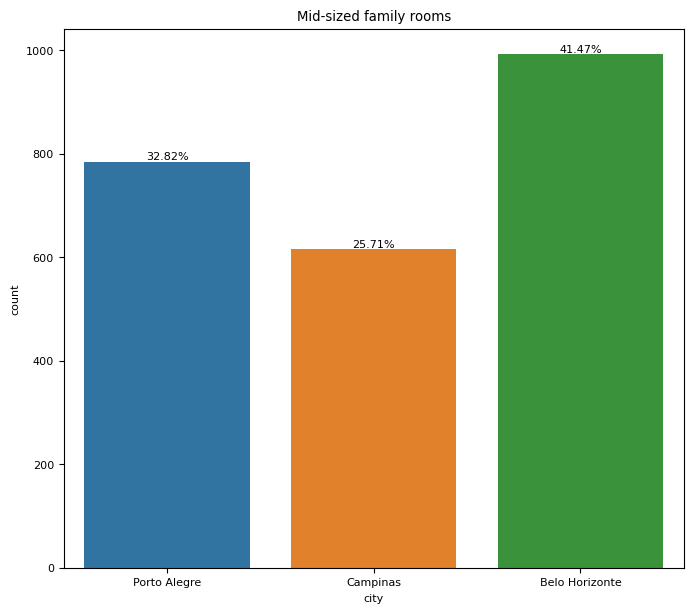

In [60]:
# Plot the graph to shows the counts for the mid sized family
def bar_percentage(ax, count: "number of rows in data "):
    for bar in ax.patches:                                           
        percentage = f"{round((bar.get_height() / count) *100, 2)}%" 
                                                                            
        x = bar.get_x() + bar.get_width() /2                          
        y = bar.get_height()                                         
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") 
                                                                     
    plt.show()

fig, ax = plt.subplots(figsize = (8, 7))
sns.countplot(x = "city", data = M_df)
plt.title('Mid-sized family rooms')

bar_percentage(ax, len(M_df))

### Interpretation:

For mid-sized families, Belo Horizonte city has the highest range of rooms available with  41% with 2 to 4 rooms.

# Level 2: Bivariate analysis.

## Relationship of Area with city

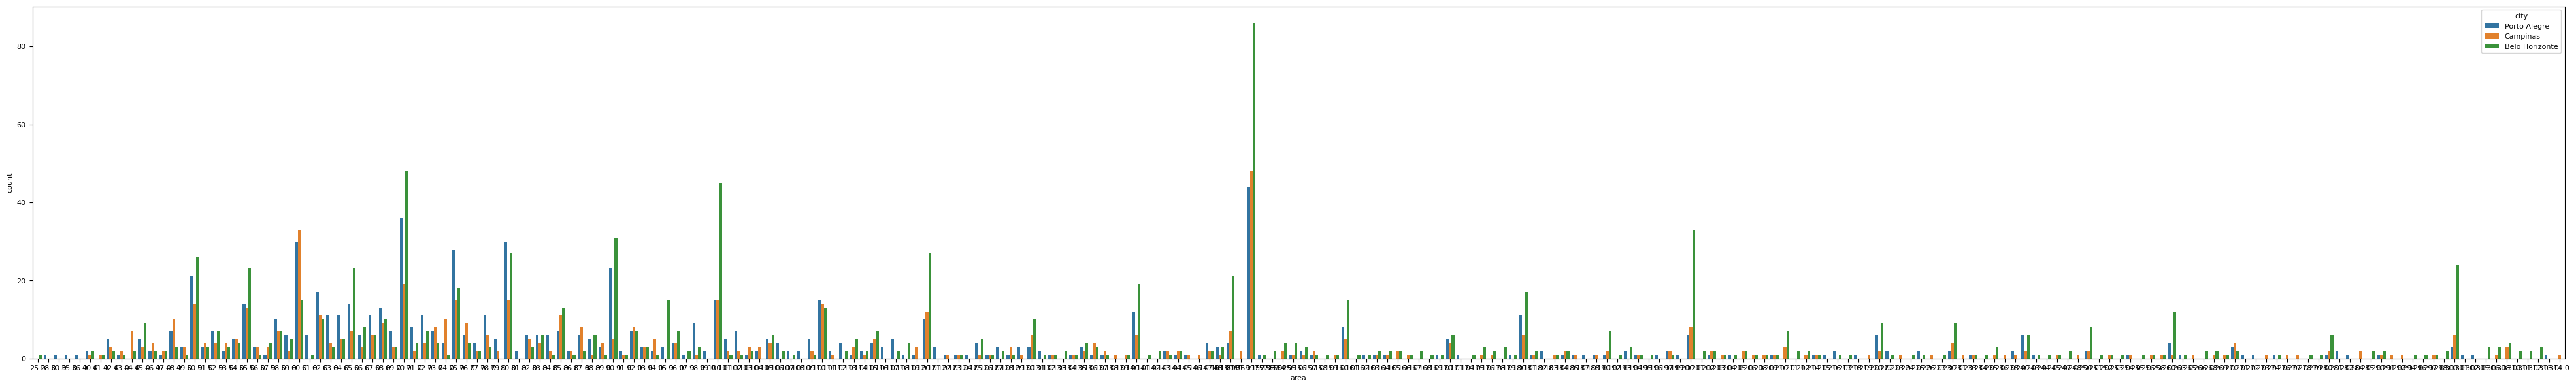

In [61]:
fig, ax = plt.subplots(figsize = (50, 7))
sns.countplot(x = "area", hue = "city", data = M_df)
plt.show()

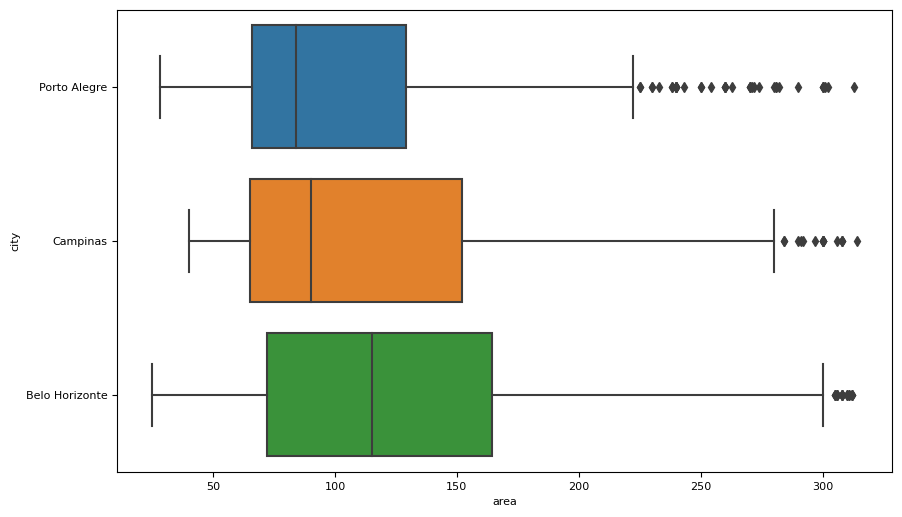

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(x='area',y='city',data=M_df)
plt.show()

# Interpretation:

In the mid sized families,  Belo Horizonte city has the highest range of houses with area 20-250 compare to other cities.


# Level 3: Multhivariate Analysis

### Further analysis:
which are the cities for mid-sized family among three cities with area between 100-200 ? To consider which city has more spreaded?
 

In [63]:
# filter the total cost, area for mid sized family.
M_df1 = M_df[(M_df['area'] >=100)&(M_df['area']<=200)]
M_df1
a=M_df1['total (R$)'].mean()
a

3894.0451987591823

In [64]:
M_df1 = M_df1[M_df1['total (R$)'] <=a]

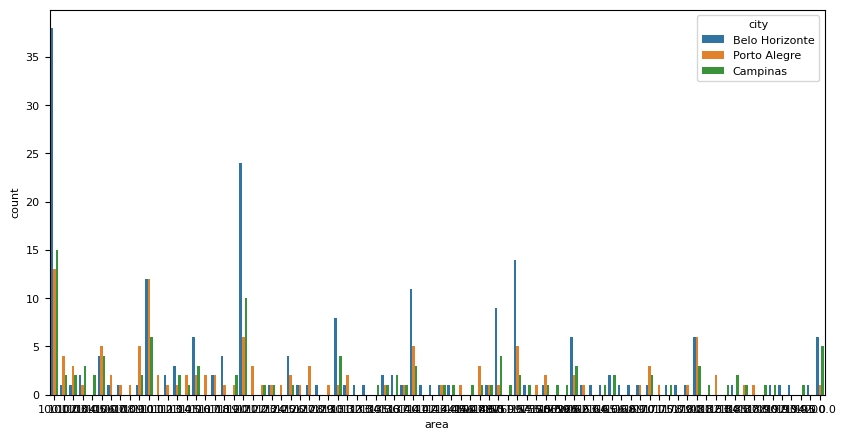

In [65]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "area", hue = "city", data = M_df1)
plt.show()

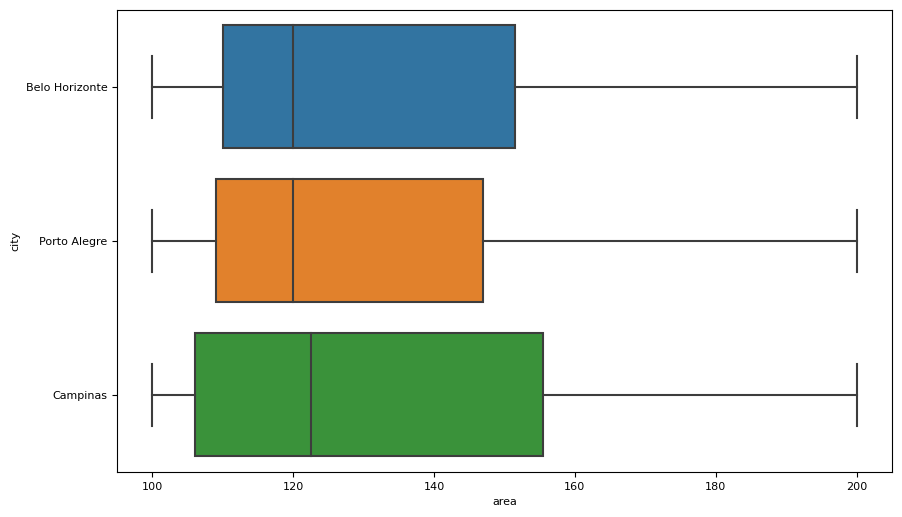

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x='area',y='city',data=M_df1)
plt.show()

# Interpretation:
Belo Horizonte and Campinas have the highest range of houses with area between 100-200, with <=4 rooms.

# Deeper Analysis.

To find which city have most affordable place and more facilities like more number of bathroom,pet allowed, furnished. 

In [67]:
# filter the area, total cost,bathroom,pets and furniture for mid sized family.
M_df1 = M_df1[(M_df1['bathroom']<=3)&(M_df1['animal']=='acept')&(M_df1['furniture']=='furnished')]
M_df1
a=M_df1['total (R$)'].mean()
a

3234.595238095238

In [68]:
M_df1 = M_df1[M_df1['total (R$)'] <=a]

In [69]:
M_df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
790,Porto Alegre,110.0,2,2,1,3.000000,acept,furnished,2579.0
1185,Campinas,151.0,2,2,1,8.000000,acept,furnished,3188.0
1768,Belo Horizonte,148.0,3,3,2,3.000000,acept,furnished,2922.0
2202,Porto Alegre,108.0,3,2,1,3.000000,acept,furnished,2945.0
2995,Porto Alegre,100.0,3,1,0,3.000000,acept,furnished,2207.0
3399,Porto Alegre,187.0,3,3,2,0.000000,acept,furnished,2953.0
3458,Porto Alegre,120.0,2,2,1,3.000000,acept,furnished,2997.0
4010,Porto Alegre,129.0,2,3,1,5.000000,acept,furnished,2915.0
4215,Porto Alegre,110.0,3,2,0,3.000000,acept,furnished,2793.0
4860,Porto Alegre,100.0,2,3,2,3.000000,acept,furnished,3088.0


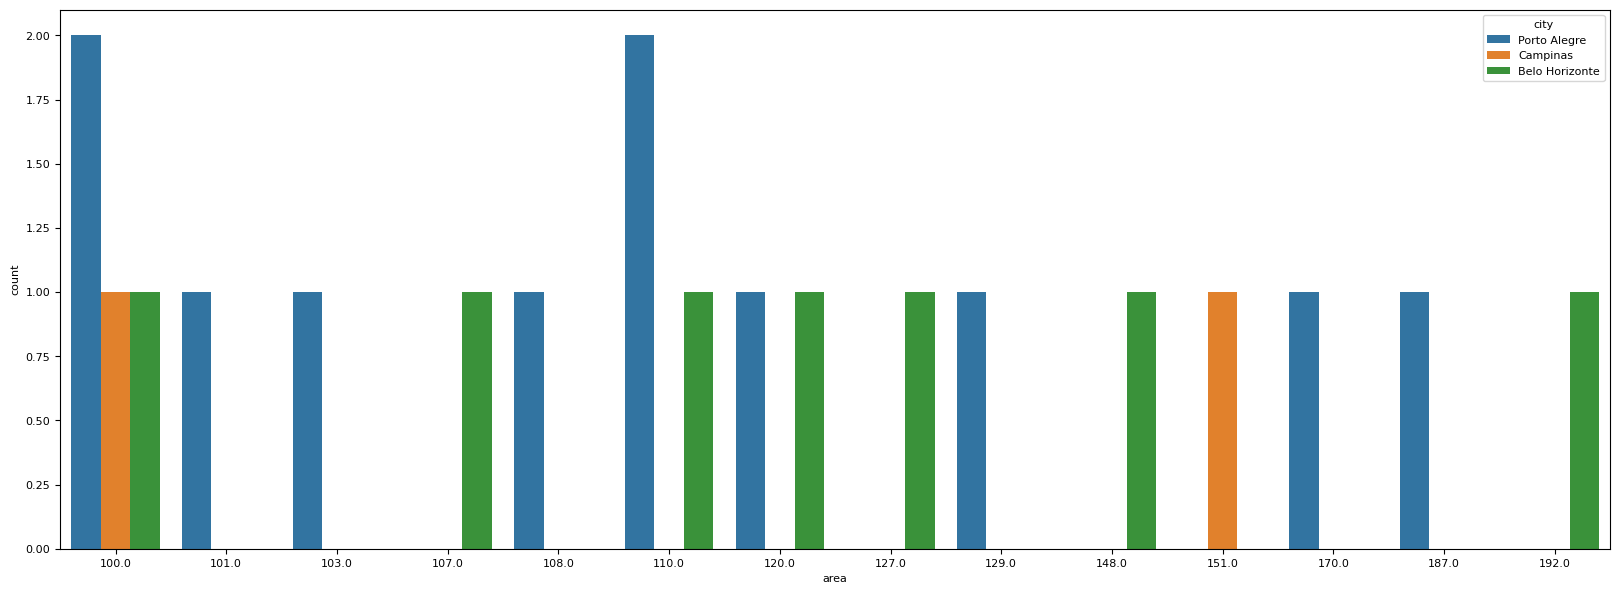

In [70]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "area", hue = "city", data = M_df1)
plt.show()

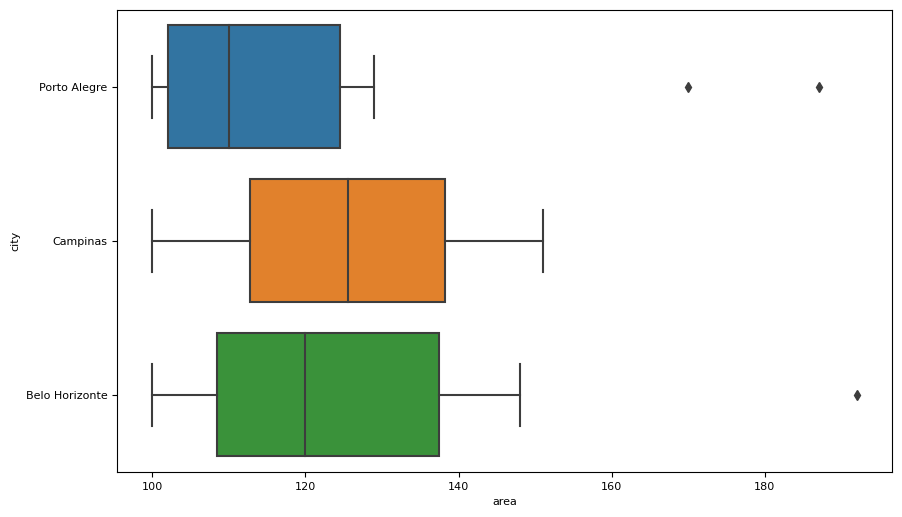

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(x='area',y='city',data=M_df1)
plt.show()

# Interpretation:
        Belo Horizonte and Porto Alegre  have highest range of houses with area between 100-200, with <=4 rooms and with more facilities in low rent.
        As per the analysis Belo Horizonte and Porto Alegre are the most affordable city for mid-sized family.

# Level 1: Univariate Analysis for  Large Family to relocate.

In [72]:
# Filter the data according to Large families.

L_df = df1[(df1['rooms'] >=4)]
              
L_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
15,Campinas,151.8977,4,6,6,0.000000,acept,furnished,4303.326574
42,Belo Horizonte,200.0000,4,2,1,7.000000,not acept,not furnished,3443.000000
65,Campinas,300.0000,4,4,3,2.000000,acept,not furnished,4303.326574
70,Belo Horizonte,220.0000,4,2,3,3.000000,acept,not furnished,3030.000000
77,Belo Horizonte,170.0000,4,3,4,9.000000,not acept,not furnished,3776.000000
...,...,...,...,...,...,...,...,...,...
10587,Belo Horizonte,151.8977,8,5,8,0.000000,acept,not furnished,5232.000000
10590,Belo Horizonte,151.8977,5,2,7,0.000000,acept,furnished,4303.326574
10599,Belo Horizonte,180.0000,6,4,6,0.000000,acept,not furnished,5800.000000
10611,Campinas,151.8977,4,5,4,0.000000,acept,not furnished,6250.000000


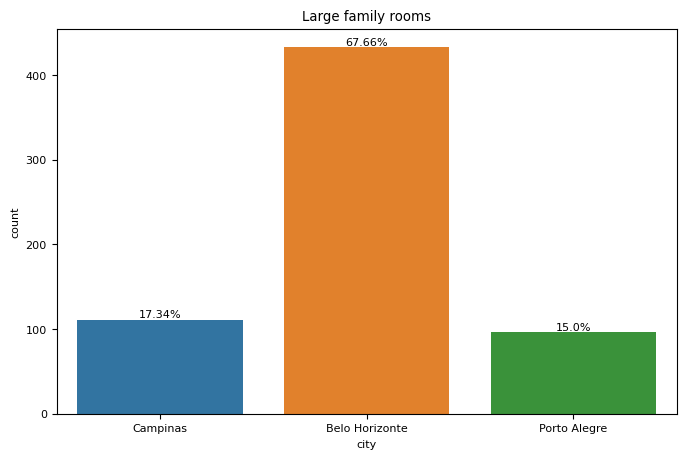

In [73]:

fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = "city", data = L_df)
plt.title('Large family rooms')

bar_percentage(ax, len(L_df))

# Interpretation:
For Large families, Belo Horizonte city has the highest range of rooms available with 68% with >=4 rooms.

# Level 2: Bivariate analysis

## Relationship of Area with city

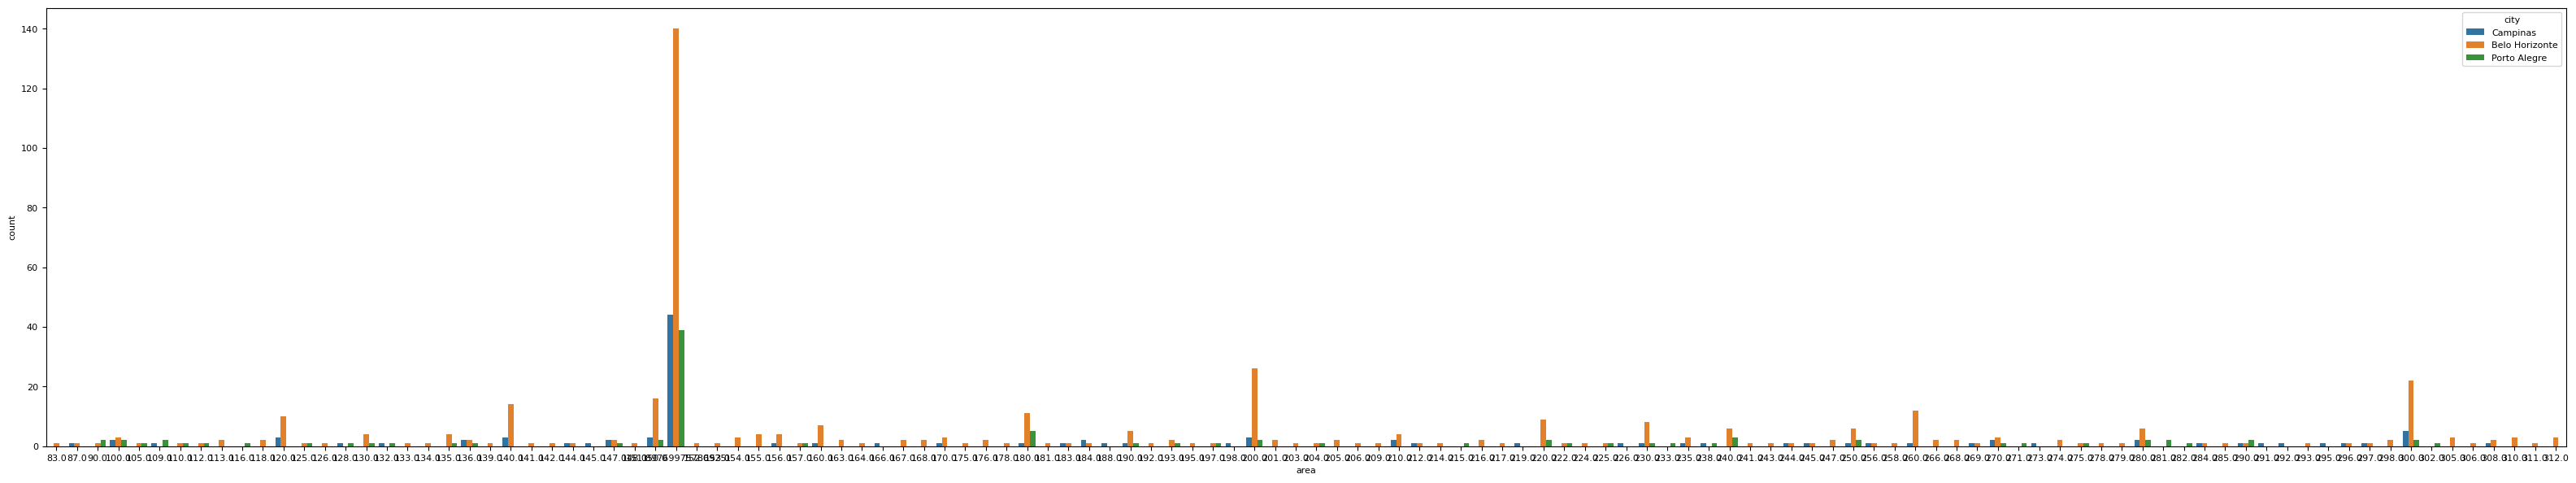

In [82]:
fig, ax = plt.subplots(figsize = (40, 7))
sns.countplot(x = "area", hue = "city", data = L_df)
plt.show()

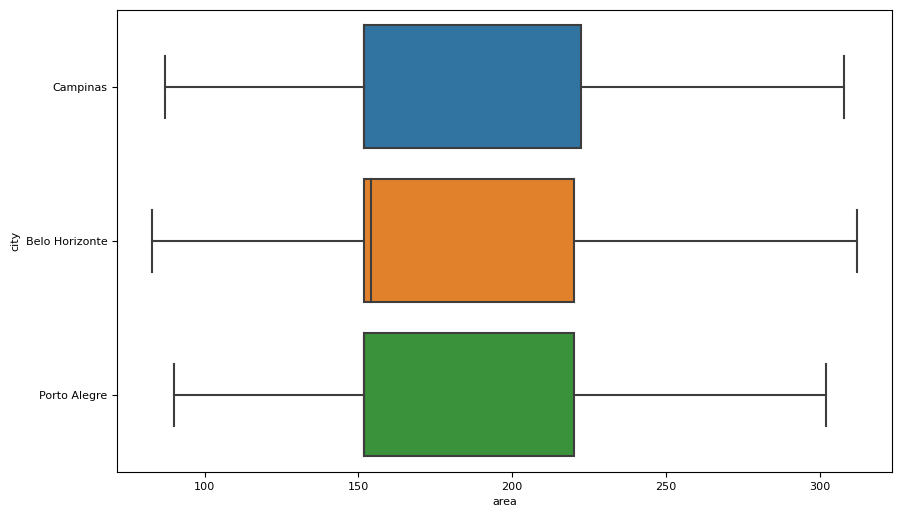

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(x='area',y='city',data=L_df)
plt.show()

# Interpretation:
For large families, Belo Horizonte city has the wide range of houses with area between 70-320 compare to other cities .

# Level 3: Multivariate Analysis

### Further analysis:
which area is best for Large family among three cities with otherfacilities ? To consider which area has more spreaded?
We have to do analyse deeper in the area > 200 range

In [76]:
L_df1 = L_df[(L_df['area'] >200)]
L_df1


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
65,Campinas,300.0,4,4,3,2.000000,acept,not furnished,4303.326574
70,Belo Horizonte,220.0,4,2,3,3.000000,acept,not furnished,3030.000000
93,Belo Horizonte,296.0,4,3,2,0.000000,acept,not furnished,4303.326574
107,Campinas,284.0,4,3,3,4.000000,acept,not furnished,4303.326574
223,Belo Horizonte,225.0,4,3,0,8.000000,acept,not furnished,4303.326574
...,...,...,...,...,...,...,...,...,...
10326,Campinas,290.0,4,3,1,5.000000,acept,not furnished,4175.000000
10342,Belo Horizonte,300.0,4,4,4,3.990012,acept,furnished,4303.326574
10418,Belo Horizonte,220.0,4,4,0,13.000000,not acept,not furnished,4303.326574
10520,Campinas,250.0,4,4,0,0.000000,acept,not furnished,5002.000000


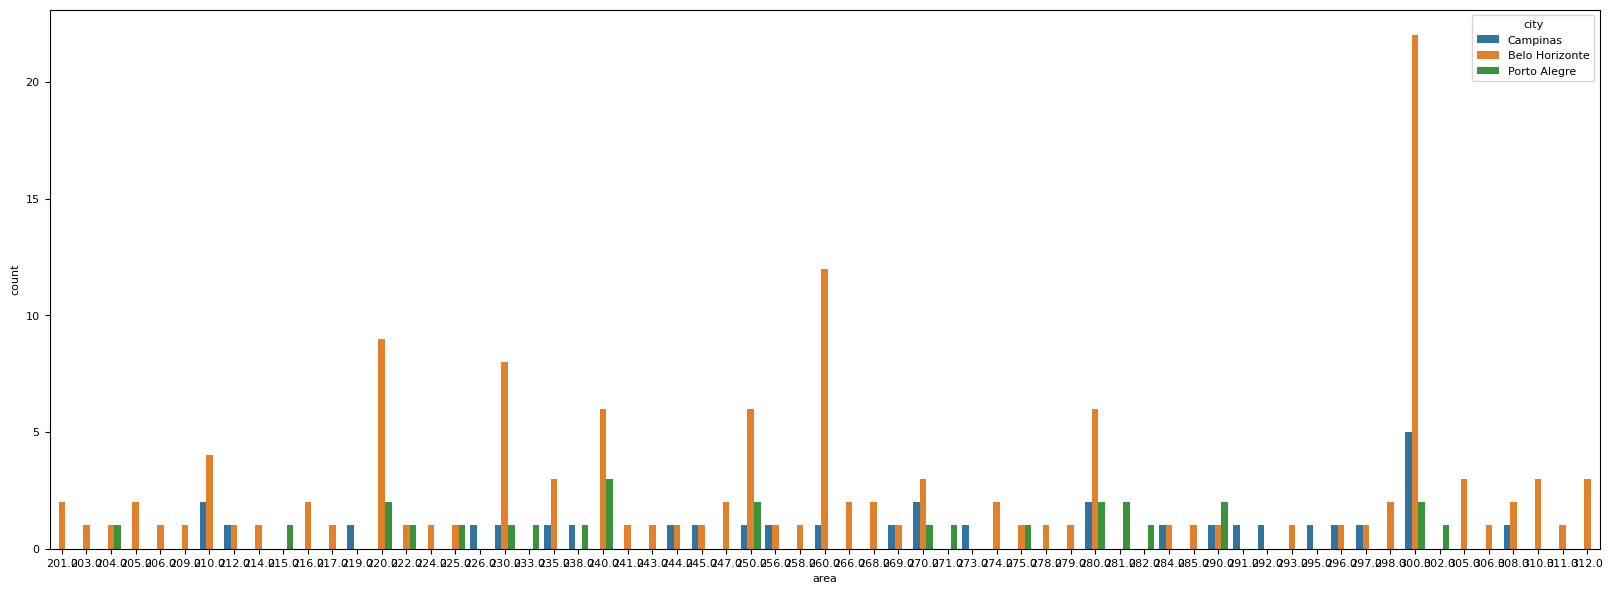

In [77]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "area", hue = "city", data = L_df1)
plt.show()

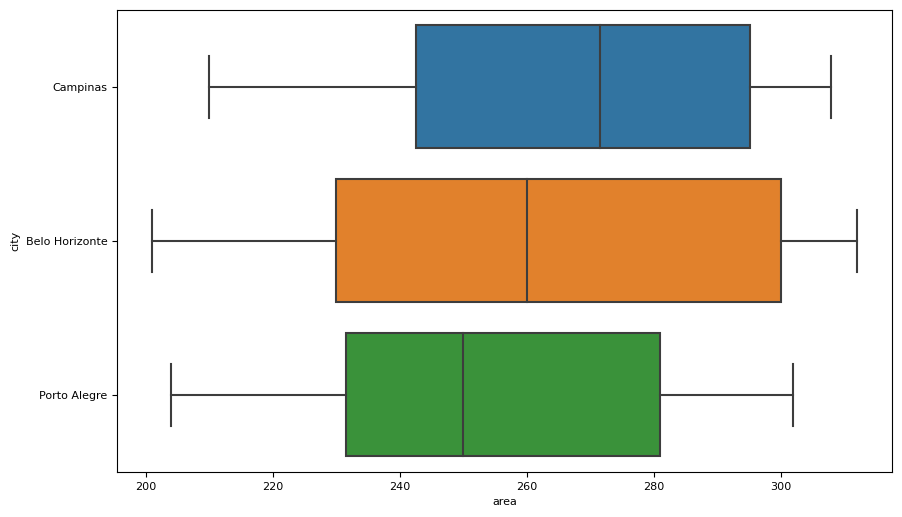

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(x='area',y='city',data=L_df1)
plt.show()

# Interpretation:
Belo Horizonte has the highest range of houses with area between >200, with >=3 rooms.

# Deeper Analysis

 To find which city have most affordable place and more facilities like more number of bathrooms,pets allowed,parking space of more vehicles and furnished.  

In [79]:
# filter the area, total cost,bathroom,pets,parking spaces and furniture for Large family.
L_df1 = L_df1[(L_df1['bathroom']>=3)&(L_df1['animal']=='acept')&(L_df1['furniture']=='furnished')&(L_df1['parking spaces']>1)]
L_df1


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
807,Belo Horizonte,298.0,4,3,2,3.000000,acept,furnished,3164.000000
1074,Belo Horizonte,280.0,4,4,3,8.000000,acept,furnished,4303.326574
1719,Belo Horizonte,230.0,4,3,4,7.000000,acept,furnished,4303.326574
1904,Belo Horizonte,308.0,4,5,6,3.990012,acept,furnished,4303.326574
2966,Porto Alegre,281.0,4,3,4,0.000000,acept,furnished,5480.000000
3548,Campinas,260.0,4,3,4,0.000000,acept,furnished,7114.000000
4177,Belo Horizonte,260.0,4,3,2,0.000000,acept,furnished,4303.326574
4539,Belo Horizonte,224.0,4,4,4,1.000000,acept,furnished,4303.326574
4841,Campinas,219.0,4,5,2,4.000000,acept,furnished,6275.000000
5283,Belo Horizonte,270.0,4,5,6,0.000000,acept,furnished,4303.326574


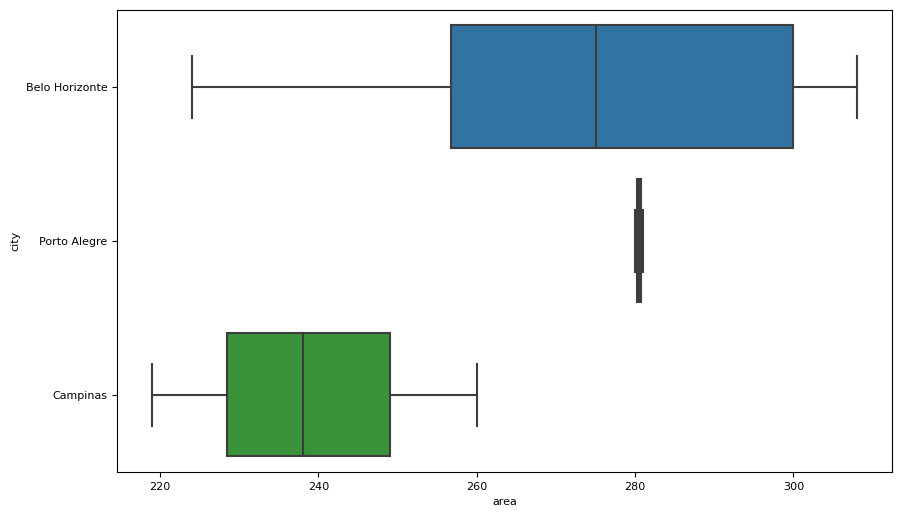

In [80]:
plt.figure(figsize=(10,6))
sns.boxplot(x='area',y='city',data=L_df1)
plt.show()

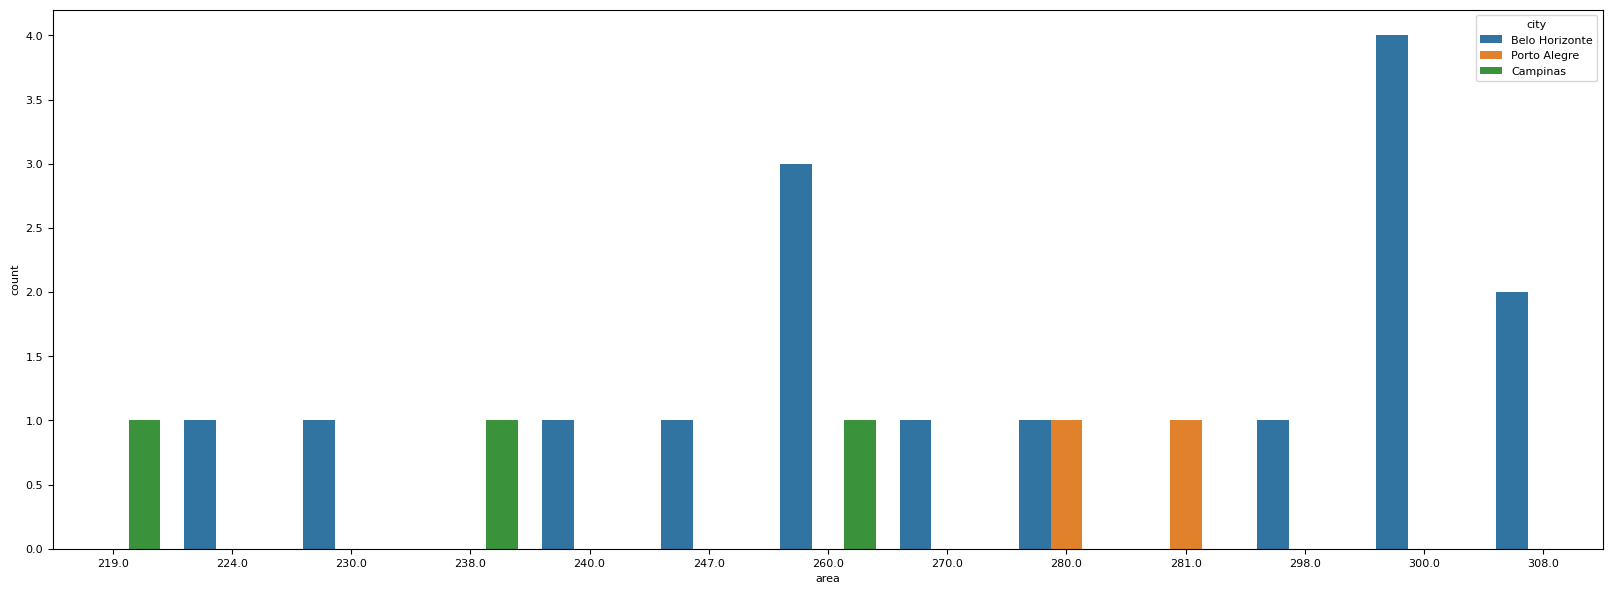

In [81]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "area", hue = "city", data = L_df1)
plt.show()

# Interpretation:
    Belo Horizonte has highest range of houses with area between >200, with >4 rooms and with more facilities.
    As per the analysis Belo Horizonte is the most affordable city for Large family.